# PCA

## Preparations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
houses = pd.read_csv("kc_house_data_processed.csv")

#print head of data
houses.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,renovated
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,47.5112,-122.257,1340,5650,0
1,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1951,47.7210,-122.319,1690,7639,1
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,47.7379,-122.233,2720,8062,0
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,47.5208,-122.393,1360,5000,0
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,47.6168,-122.045,1800,7503,0


## Standardize Data

Standardization so that all mean columns have a mean of zero. This is necessary because otherwise variables with higher variance would also have a higher loading.

In [2]:
#Import StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

#list with all features except the price
features=list(houses.columns)
features.remove('price')
print(features)

# feature values
x = houses.loc[:, features].values

# price values
y = houses.loc[:,['price']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)
print(x[0])



['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated']
[-0.41122525 -1.52794577 -0.98938739 -0.2279585  -0.91533514 -0.08695551
 -0.30540478 -0.63006426 -0.56084535 -0.73825827 -0.66125836 -0.54471554
 -0.35272803 -0.30570268 -0.94394549 -0.26049304 -0.20990652]


## Explained Variance

Principal components are calculated and their explained variance are illustrated. 

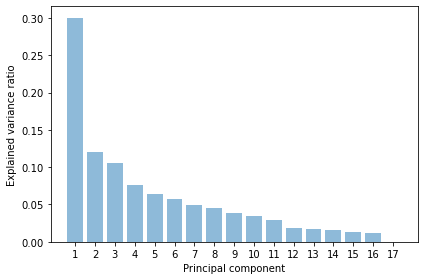

                    PC1       PC2       PC3       PC4       PC5       PC6  \
bedrooms       0.255652  0.174517 -0.080252 -0.334058 -0.053068  0.249416   
bathrooms      0.365558  0.002228 -0.124978 -0.053832 -0.024465  0.083060   
sqft_living    0.402026  0.194593 -0.009884 -0.113372  0.026654  0.031972   
sqft_lot       0.100125 -0.038568  0.630637  0.025070  0.184538 -0.081771   
floors         0.246279 -0.273366 -0.221072  0.231724  0.135795 -0.040359   
waterfront     0.048000  0.237388  0.046996  0.591845 -0.319149 -0.100939   
view           0.117685  0.376383  0.062240  0.443468 -0.231598 -0.130847   
condition     -0.092075  0.309341  0.112976 -0.313750 -0.234892 -0.085553   
grade          0.375403  0.043906 -0.084423  0.045901  0.081918 -0.134663   
sqft_above     0.398960 -0.056336 -0.012441  0.015267  0.059711  0.032887   
sqft_basement  0.083791  0.506552  0.002857 -0.262328 -0.056580  0.004499   
yr_built       0.253460 -0.386870 -0.083050  0.037744 -0.227095 -0.078385   

In [3]:
from sklearn.decomposition import PCA
pca = PCA()

#calculate principle components
pca.fit_transform(x)

#array with explained variance of each principle component
exp_var_pca = pca.explained_variance_ratio_

#plot illustrating explained variances by principle components
plt.bar(range(1,len(exp_var_pca)+1), exp_var_pca, alpha=0.5, align='center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component')
plt.xticks(range(1,len(exp_var_pca)+1))
plt.tight_layout()
plt.savefig('../Paper/PCAVariance.pgf')
plt.show()

# data frame with loadings of each vector
loadings = pd.DataFrame(pca.components_.T, 
                        columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
                                 'PC11','PC12','PC13','PC14','PC15','PC16','PC17'], index=features)
print(loadings)


## Projecting data into two-dimensional space

The first two prinicpal components are used to project the data into a two-dimensional space.

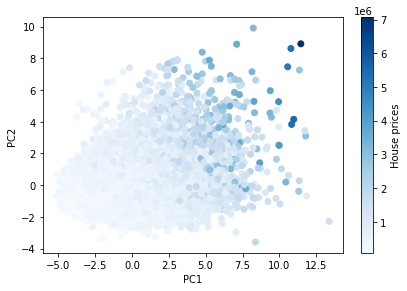

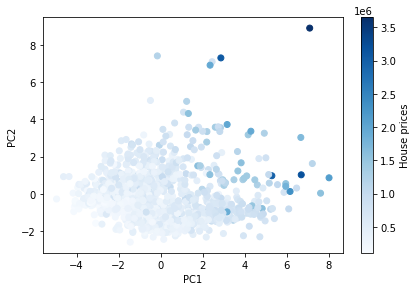

In [4]:
#select first two components
pca = PCA(n_components=2)

#calculate principle components
principalComponents = pca.fit_transform(x)

#store transformed values for each observation in the data frame
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

#add column with price
finalDf = pd.concat([principalDf, houses[['price']]], axis = 1)
finalDf.head(5)

#plot data in two dimensional space
plt.scatter(finalDf["principal component 1"], finalDf["principal component 2"], c=finalDf["price"], cmap='Blues')
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.tight_layout()
plt.colorbar(label='House prices')
plt.savefig('../Paper/2DProjection_all.png')
plt.show()


#take a random sample of 1000 observations 
plotDf=finalDf.sample(1000)

#plot data in two dimensional space and add price tags
plt.scatter(plotDf["principal component 1"], plotDf["principal component 2"], c=plotDf["price"], cmap='Blues')
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.tight_layout()
plt.colorbar(label='House prices')
plt.savefig('../Paper/2DProjection_1000.png')
plt.show()
